**J. Jung "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."**

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm
from sklearn.neural_network import MLPClassifier


#ensemble classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm

from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_auc_score, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

## Business and data understanding (e.g., problem statement, business contexts, the significance of the problem, the business value of the solution)

We are interested to know whether ticket holder will renew their seasonal ticket in next year or not. In order to predict it precisely, it is important to arrange dataset and apply fit algorithm to existing dataset for forecasting whether they plan to renew their ticket.

Before I do perform detail analysis, I believe following variables are important that must be considered to build model to predict whether customer will renew their sport seasonal ticket or not in next year.
- How often they attended games last season
- The number of years as a season ticket holder
- The number of child

## Data processing (ETL): A variety of ETL techniques should be used.

In [15]:
# load dataset file 
df=pd.read_excel("train_test_dataset.xlsx")
df.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94,4,NaN,0,1,NaN,,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,,,NaN,0,0,NaN,1,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67,2,NaN,0,1,0.0,,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62,4,,1,1,0.0,1,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89,4,,1,1,0.0,,65,194


In [16]:
# replace empty rows to NaN
df=df.replace(r'\s+', np.nan, regex=True)
df.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94.0,4.0,NaN,0.0,1.0,NaN,NaN,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,NaN,NaN,NaN,0.0,0.0,NaN,1.0,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67.0,2.0,NaN,0.0,1.0,0.0,NaN,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62.0,4.0,NaN,1.0,1.0,0.0,1.0,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89.0,4.0,NaN,1.0,1.0,0.0,NaN,65,194


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 19 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         7223 non-null float64
INCOME      7272 non-null float64
CHILD       582 non-null float64
GNDR        8718 non-null float64
OWNHOME     7217 non-null float64
SPORT       4273 non-null float64
COMP        1009 non-null float64
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
dtypes: float64(7), int64(11), object(1)
memory usage: 1.3+ MB


In [18]:
# find how many missing values exist at each coulmn
df.isnull().sum()

FAKEID         0
Y2defect       0
Y1G5           0
Y1G4           0
Y1G3           0
Y1G2           0
Y1G1           0
Y1price        0
YEARS          0
BACKER         0
AGE         1993
INCOME      1944
CHILD       8634
GNDR         498
OWNHOME     1999
SPORT       4943
COMP        8207
PCTMARR        0
HOMEVAL        0
dtype: int64

In [19]:
# create column total number of games attedend
df['Total_games_a'] = df['Y1G5'] + df['Y1G4']+ df['Y1G3']+ df['Y1G2']+ df['Y1G1']
df.head(1)

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL,Total_games_a
0,580V74KT,0,0,0,1,1,1,15,8,1,94.0,4.0,NaN,0.0,1.0,NaN,NaN,77,203,3


- there are too many missing values in child, sport and comp column so they are dropped.
- Y1Gx columns are not useful anymore for anlalysis, so they need to be dropped. 

In [20]:
# drop columns
df=df.drop(['CHILD','COMP','SPORT','Y1G5','Y1G4','Y1G3','Y1G2','Y1G1'], axis=1)
df.head(1)

,FAKEID,Y2defect,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,PCTMARR,HOMEVAL,Total_games_a
0,580V74KT,0,15,8,1,94.0,4.0,0.0,1.0,77,203,3


In [21]:
# replace empty rows to each column's mean value. 
df["AGE"].fillna(df["AGE"].mean(), inplace=True)
df["INCOME"].fillna(df["INCOME"].mean(), inplace=True)
df["GNDR"].fillna(df["GNDR"].mean(), inplace=True)
df["OWNHOME"].fillna(df["OWNHOME"].mean(), inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 12 columns):
FAKEID           9216 non-null object
Y2defect         9216 non-null int64
Y1price          9216 non-null int64
YEARS            9216 non-null int64
BACKER           9216 non-null int64
AGE              9216 non-null float64
INCOME           9216 non-null float64
GNDR             9216 non-null float64
OWNHOME          9216 non-null float64
PCTMARR          9216 non-null int64
HOMEVAL          9216 non-null int64
Total_games_a    9216 non-null int64
dtypes: float64(4), int64(7), object(1)
memory usage: 864.1+ KB


## Data visualization: This section includes many charts, pivot tables, and other visualizations using matplotlib, seaborn, groupby, pivot, etc.

In [22]:
# pivot table for Y2defect
df.groupby(['Y2defect']).mean()

,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,PCTMARR,HOMEVAL,Total_games_a
Y2defect,,,,,,,,,,
0,20.170356,6.777778,0.584418,61.740804,2.865717,0.443267,0.726465,58.536458,109.368273,2.429253
1,19.755859,5.978299,0.394531,61.045019,2.898585,0.451205,0.710697,57.920573,114.854167,2.082031


Y2defect = 0 means ticket holders that did renew for year 2. According to pivot table above, we can see than ticket holders who did renew for year2 have ticket for more years and are member of backer club. Also, they watched more game in season year 1 and their average house price is lower.  

## Exploratory data analysis: This section includes correlation analysis, pairwise heatmaps, and statistical hypothesis tests (e.g., t-testing, ANOVA)

In [23]:
# correlation analysis
corr = pd.DataFrame(df.corr()['Y2defect'].drop('Y2defect'))
corr

,Y2defect
Y1price,-0.023498
YEARS,-0.139099
BACKER,-0.189929
AGE,-0.023682
INCOME,0.010034
GNDR,0.008207
OWNHOME,-0.019812
PCTMARR,-0.023869
HOMEVAL,0.029722
Total_games_a,-0.164720


Years, Backer and Total number of games they watched have stronger corrleationship with Y2 defect than other variables. 

** Hypothesis test of Y2defects in terms of Years, Backer and Total number of games ** 

In [24]:
#Hypothesis test of Y2defect in terms of Years
import scipy.stats as stats
Y2defect_yes_YEARS = df[df['Y2defect'] == 1]['YEARS']
Y2defect_no_YEARS = df[df['Y2defect'] == 0]['YEARS']
stats.ttest_ind(Y2defect_yes_YEARS, Y2defect_no_YEARS)
two_sample= stats.ttest_ind(Y2defect_yes_YEARS, Y2defect_no_YEARS)
print "The t-statistic is %.3f and the p-value is %.3f." % two_sample

The t-statistic is -13.483 and the p-value is 0.000.


In [25]:
#Hypothesis test of Y2defect in terms of Backer
Y2defect_yes_BACKER = df[df['Y2defect'] == 1]['BACKER']
Y2defect_no_BACKER = df[df['Y2defect'] == 0]['BACKER']
stats.ttest_ind(Y2defect_yes_BACKER, Y2defect_no_BACKER)
two_sample= stats.ttest_ind(Y2defect_yes_BACKER, Y2defect_no_BACKER)
print "The t-statistic is %.3f and the p-value is %.3f." % two_sample

The t-statistic is -18.569 and the p-value is 0.000.


In [26]:
#Hypothesis test of Y2defect in terms of Total games watched
Y2defect_yes_Total_games_a = df[df['Y2defect'] == 1]['Total_games_a']
Y2defect_no_Total_games_a = df[df['Y2defect'] == 0]['Total_games_a']
stats.ttest_ind(Y2defect_yes_Total_games_a, Y2defect_no_Total_games_a)
two_sample= stats.ttest_ind(Y2defect_yes_Total_games_a, Y2defect_no_Total_games_a)
print "The t-statistic is %.3f and the p-value is %.3f." % two_sample

The t-statistic is -16.030 and the p-value is 0.000.


- all top three Results are showing that Null hypothesis is rejected which means they are not same. 
- Since we have a low p value, we do not accept the null hypothsis. That means those who are renewing ticket or not are different in terms of Years, Backer and Total game they watched in first season. 

## Model building: This is a critical part of your project. You use a variety of classifiers (or algorithms) and build multiple models

### SelectKBest

In [27]:
y = df['Y2defect']
X = df.drop(['Y2defect','FAKEID'], axis=1)

In [28]:
X.head(1)

,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,PCTMARR,HOMEVAL,Total_games_a
0,15,8,1,94.0,4.0,0.0,1.0,77,203,3


In [29]:
X_new = SelectKBest(chi2, k=3).fit_transform(X, y)
print X_new

[[   8.    1.  203.]
 [   3.    1.   68.]
 [  11.    1.   38.]
 ..., 
 [   6.    0.   95.]
 [   7.    1.   37.]
 [   7.    1.  344.]]


In [30]:
# SelectKBEST 
X_new = SelectKBest(chi2, k=3).fit(X, y)
print X_new.get_support(indices=True)


[1 2 8]


** YEARS, BACKER, and HOMEVAL are important variables by using SelectKBest. **

### Recursive Feature Selection

In [31]:
model = LogisticRegression()
rfe = RFE(model, 2)  #asking four best attributes
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False False  True False False False False False False  True]
[5 3 1 6 7 4 2 8 9 1]


In [32]:
# Features sorted by their rank
pd.DataFrame({'feature':X.columns, 'importance':rfe.ranking_})

,feature,importance
0,Y1price,5
1,YEARS,3
2,BACKER,1
3,AGE,6
4,INCOME,7
5,GNDR,4
6,OWNHOME,2
7,PCTMARR,8
8,HOMEVAL,9
9,Total_games_a,1


In [33]:
X_logistic = df[['BACKER','Total_games_a']]
print X_logistic.head()

   BACKER  Total_games_a
0       1              3
1       1              2
2       1              2
3       0              3
4       0              1


** Decision Tree **

In [34]:
# evaluate the model by splitting into train (70%) and test sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X_logistic, y, test_size=0.3, random_state=0)
#model2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3,min_samples_leaf=5)
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)

#Model evaluation
print metrics.accuracy_score(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.roc_auc_score(y_test, dt.predict(X_test))

0.599638336347
--------------------------------------------------------
[[1004  359]
 [ 748  654]]
--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.57      0.74      0.64      1363
          1       0.65      0.47      0.54      1402

avg / total       0.61      0.60      0.59      2765

--------------------------------------------------------
0.601543440196


** K-nearestNeighbors **

C:\Users\jhjoa\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\jhjoa\Anaconda2\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


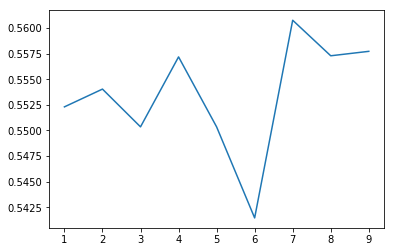

In [35]:
# automatic grid search for an optimal value of K
#http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html

from sklearn.grid_search import GridSearchCV

knn = KNeighborsClassifier()
k_range = range(1, 10)
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X_logistic, y)

# check the results of the grid search
grid.grid_scores_
grid_mean_scores = [result[1] for result in grid.grid_scores_]
plt.figure()
plt.plot(k_range, grid_mean_scores)
plt.show()

In [36]:
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.560763888889
{'n_neighbors': 7}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')


In [37]:
# develop a new knn model with k = 7
X_train, X_test, y_train, y_test = train_test_split(X_logistic, y, test_size=0.3, random_state=0)
dt = KNeighborsClassifier(n_neighbors=7)
dt.fit(X_train, y_train)
#Model evaluation
print metrics.accuracy_score(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.roc_auc_score(y_test, dt.predict(X_test))

0.602169981917
--------------------------------------------------------
[[947 416]
 [684 718]]
--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.58      0.69      0.63      1363
          1       0.63      0.51      0.57      1402

avg / total       0.61      0.60      0.60      2765

--------------------------------------------------------
0.603458218686


** LogisticRegression **

In [38]:
# evaluate the model by splitting into train and test sets and build a logistic regression model
# name it as "lr"
X_train, X_test, y_train, y_test = train_test_split(X_logistic, y, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)
#Model evaluation
print metrics.accuracy_score(y_test, lr.predict(X_test))
print metrics.confusion_matrix(y_test, lr.predict(X_test))
print metrics.classification_report(y_test, lr.predict(X_test))
print metrics.roc_auc_score(y_test, lr.predict(X_test))

0.59095840868
[[866 497]
 [634 768]]
             precision    recall  f1-score   support

          0       0.58      0.64      0.60      1363
          1       0.61      0.55      0.58      1402

avg / total       0.59      0.59      0.59      2765

0.591576021259


- Knn Algorithms is the best one using RFS method as feature selection method. It gives 60.3% of AUC score and very simple model which is only using 2 varialbes (BACKER and Total number of games watched).

## Final analysis & storytelling (technical and managerial implications and suggestions). This should be considered the most important section in this project. Your client may be interested in this section only and use the previous sections as more like references. Insightful conclusions should be drawn and communicated with “business” people (e.g., K-State Athletic Department).

**Once I have finished arranging dataset, I used hypothesis test, correlation anaylsis and two different feature selection method (SelectKBest and RFS). All analysis shows that YEARS, BACKER, and The number of game watched are significantly important predictors to forecast wherther ticker holder renew their ticker or not. I found KNN Algorithme gives the highest AUC score which is 60.3% and using only two variables (Backer and number of games watched). Therefore, I think it is very simple enough to be used pratically. However, If dataset is updated, additional feature selection and finding adequate model need to be performed again in order to update AUC score. **


- Who is likely to renew “season ticket”? 
- Who is likely to defect? 
- What actions do you recommend K-State Athletic Department (or other sports teams) to take? 
- What additional variables would you need to improve the model prediction? 
- Any other suggestions

** Ticket holders who have longer ticker hold years, backer club member, and frequent watching game tend to renew their seasonal pass ticket for additional years. 
I would recommend K-State Athletic Department to take following actions.**

**1. Give a call to ticket holder who is not sure to renew ticket for next year and see what promotion they can provide.**
**2. Do survey to see why they miss some games in a season and how they could improve their service. **

**In order to have better model prediction, Department should make an effort to reduce missing values in their existing or future dataset. In addition, few more data is probably needed such as trasporation method, accommodation, and weather. **
